## A key concept in `MeshArrays.jl` is the exchange of data between neighboring arrays

Load the `MeshArrays.jl` and `Plots.jl` package modules

In [1]:
using MeshArrays, Plots

┌ Info: Recompiling stale cache file /Users/gforget/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


Download the pre-defined grid if needed

In [2]:
if !isdir("GRID_CS32") 
    run(`git clone https://github.com/gaelforget/GRID_CS32`)
end

Select `cube sphere` grid and read `ocean depth` variable

In [3]:
mygrid=GridSpec("CS32")
D=mygrid.read(mygrid.path*"Depth.data",MeshArray(mygrid,Float32))
show(D)

 gcmarray 
  grid type   = cs
  data type   = Float32
  tile array  = (6,)
  tile sizes  = (32, 32)
                (32, 32)
                (32, 32)
                (32, 32)
                (32, 32)
                (32, 32)


Use the `exchange` function to add neighboring points at face edges

In [4]:
Dexch=exchange(D,4)
show(Dexch)

 gcmarray 
  grid type   = cs
  data type   = Float32
  tile array  = (6,)
  tile sizes  = (40, 40)
                (40, 40)
                (40, 40)
                (40, 40)
                (40, 40)
                (40, 40)


Illustrate what happened using `Plots.jl`

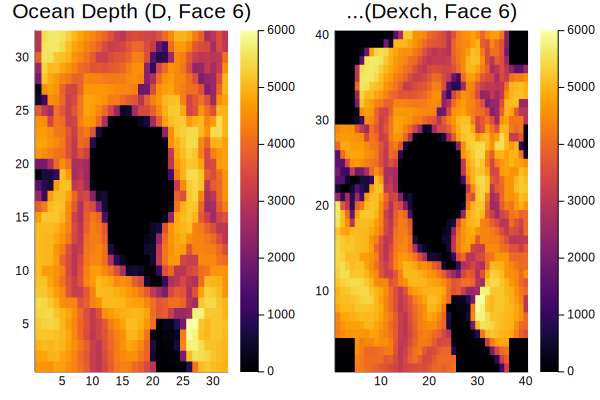

In [5]:
P=heatmap(D.f[6],title="Ocean Depth (D, Face 6)")
Pexch=heatmap(Dexch.f[6],title="...(Dexch, Face 6)")
plot(P,Pexch)